# 1. GBDT Model 

In [245]:
# 导入pandas模块
import pandas as pd

# 读取csv文件
df = pd.read_csv('D:/desk/JNU/MLpredictionresults/sample.csv')

df.head()

,id,lon,lat,being-away,coherence,scope,fascination,depth_max,depth_min,depth_mean,...,pole,land,fountain,tent,animal,bicycle,traffic light,trash can,car,water/river
0,3,120.268239,31.493243,1.83,3.83,2.67,2.67,5.580865,0.677712,2.389539,...,0.001465,0.000010,0.00001,0.00001,0.00001,0.017516,0.00001,0.000004,0.024501,0.000010
1,13,120.270670,31.493929,3.00,4.00,3.33,2.50,6.132592,0.836993,3.106674,...,0.000010,0.000010,0.00001,0.00001,0.00001,0.000010,0.00001,0.000010,0.033604,0.003423
2,23,120.272383,31.491874,2.67,4.50,4.00,4.00,6.033537,0.753738,3.469768,...,0.000003,0.000010,0.00001,0.00001,0.00001,0.003876,0.00001,0.000010,0.036343,0.000021
3,33,120.269328,31.492629,3.67,4.17,3.17,2.67,5.922921,0.804315,2.945493,...,0.000010,0.000010,0.00001,0.00001,0.00001,0.000059,0.00001,0.000010,0.046238,0.000010
4,43,120.259063,31.492105,4.33,4.33,3.50,4.00,5.113361,0.787877,2.550875,...,0.000295,0.000186,0.00001,0.00001,0.00001,0.000010,0.00001,0.000010,0.034102,0.017339


In [246]:
X = df.iloc[:,7:]
X.head(2)

,depth_max,depth_min,depth_mean,depth_std,canny_edge,h_mean,h_std,s_mean,s_std,v_mean,...,pole,land,fountain,tent,animal,bicycle,traffic light,trash can,car,water/river
0,5.580865,0.677712,2.389539,1.16676,49.823,0.43462,0.22064,0.24917,0.17598,0.53992,...,0.001465,0.00001,0.00001,0.00001,0.00001,0.017516,0.00001,0.000004,0.024501,0.000010
1,6.132592,0.836993,3.106674,1.29707,60.593,0.27567,0.23469,0.14871,0.19459,0.71688,...,0.000010,0.00001,0.00001,0.00001,0.00001,0.000010,0.00001,0.000010,0.033604,0.003423


being-away

In [247]:
df.iloc[:,3]

0      1.83
1      3.00
2      2.67
3      3.67
4      4.33
       ... 
195    1.50
196    2.50
197    3.67
198    5.33
199    4.00
Name: being-away, Length: 200, dtype: float64

In [248]:
import joblib
# 导入模块
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# 导入sklearn.model_selection模块
from sklearn.model_selection import train_test_split

In [198]:
# 指定自变量和因变量
X = df.iloc[:,7:] # 假设你有两个自变量x1和x2
y = df.iloc[:,4] # 假设你有一个因变量y

# 划分数据集，设置测试集占比为0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [254]:
for i in range(500):
    # 指定自变量和因变量
    X = df.iloc[:,7:] # 假设你有两个自变量x1和x2
    y = df.iloc[:,3] # 假设你有一个因变量y

    # 划分数据集，设置测试集占比为0.2
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # 创建模型
    gbdt = GradientBoostingRegressor(loss='huber',          #{'absolute_error', 'huber', 'quantile', 'squared_error'}
                                     learning_rate=0.01,
                                     n_estimators=100, 
                                     max_depth=15,
                                     max_features='sqrt',
                                     min_samples_leaf=10,
                                     min_samples_split=10,
                                     random_state =42)

    # 训练模型
    gbdt.fit(X_train, y_train)

    # 预测测试集
    y_pred = gbdt.predict(X_test)

    # 计算均方误差
    mse = mean_squared_error(y_test, y_pred)
    #print('MSE:', mse)

    # 计算R方
    r2 = r2_score(y_test, y_pred)
    #print('R-squared:', r2)
    
    if r2 >=0.36:
        joblib.dump(gbdt,'D:/desk/JNU/MLpredictionresults/being_away.pkl')
        # 创建模型
        gbdt = GradientBoostingRegressor(loss='huber',          #{'absolute_error', 'huber', 'quantile', 'squared_error'}
                                         learning_rate=0.01,
                                         n_estimators=5000, 
                                         max_depth=15,
                                         max_features='sqrt',
                                         min_samples_leaf=10,
                                         min_samples_split=10,
                                         random_state =50)
        # 训练模型
        gbdt.fit(X_train, y_train)
        
        # 预测测试集
        y_pred = gbdt.predict(X_test)
        print('最优目标')
        
        # 计算均方误差
        mse = mean_squared_error(y_test, y_pred)
        print('MSE:', mse)

        # 计算R方
        r2 = r2_score(y_test, y_pred)
        print('R-squared:', r2)
        break
    else:
        print('MSE:', mse)
        print('R-squared:', r2)

MSE: 0.44380953401243445
R-squared: 0.258204485150781
MSE: 0.5469363362227508
R-squared: 0.21687909865787103
MSE: 0.8636597897971846
R-squared: 0.11272944155284736
MSE: 0.6221461414035729
R-squared: 0.17142129361119884
MSE: 0.7956593934439946
R-squared: 0.14553040131796646
MSE: 0.5603862735553775
R-squared: 0.2067123580698812
MSE: 0.9847236152119834
R-squared: 0.09247912859811991
MSE: 0.6192671606305936
R-squared: 0.18821364676888008
MSE: 0.594633619662966
R-squared: 0.28922966098543335
MSE: 0.527854497798212
R-squared: 0.2022016570996994
MSE: 0.6421943122890887
R-squared: 0.2577263726967697
MSE: 0.36203495573748157
R-squared: 0.1255457011784059
MSE: 0.8154510850237967
R-squared: 0.1389552500858262
MSE: 0.818154373349679
R-squared: 0.204084307027661
MSE: 0.5092335378466064
R-squared: 0.09365504588984619
MSE: 0.6507104808578974
R-squared: 0.14712198086426242
MSE: 0.6235280761376967
R-squared: 0.2716508238237175
MSE: 0.6597060766648797
R-squared: 0.09579480382871286
MSE: 0.53361931289407

MSE: 0.5859149848984744
R-squared: 0.14911524931422027
MSE: 0.5508989897699446
R-squared: 0.12867034733349914
MSE: 0.9483708135237124
R-squared: 0.1539386761529924
MSE: 0.65681064843374
R-squared: 0.23618919659728255
MSE: 0.5686435831541823
R-squared: 0.21881435637430113
MSE: 0.8315002700427752
R-squared: 0.14107955362722036
MSE: 0.4423216711547269
R-squared: 0.32683479007034544
MSE: 0.7618316862006272
R-squared: 0.00786985611829627
MSE: 0.6864004922042332
R-squared: 0.11785557423423232
MSE: 0.34994251557647404
R-squared: 0.16171343838037022
MSE: 0.6212004814875746
R-squared: 0.2061589323183609
MSE: 0.8297492305516354
R-squared: 0.1738835648397049
MSE: 0.5329202376385811
R-squared: 0.14212469182169962
MSE: 0.49919886143615183
R-squared: 0.23277480479251444
MSE: 0.7129616336689589
R-squared: 0.1946664012172613
MSE: 0.6890452921565473
R-squared: 0.23092130223972773
MSE: 1.0314118707209663
R-squared: 0.04696214991834857
MSE: 0.5665370154816962
R-squared: 0.18367012416092643
MSE: 0.6476218

MSE: 0.8941981837948919
R-squared: 0.11453055264972534
MSE: 0.657663123494151
R-squared: 0.20150895769673838
MSE: 0.6575935793697314
R-squared: 0.2589195902073467
MSE: 0.5759035534053994
R-squared: 0.15391284389305382
MSE: 0.6421171591495235
R-squared: 0.12795801700694664
MSE: 0.6875251874954262
R-squared: 0.13406654219249314
MSE: 0.8374970648779406
R-squared: 0.19110110070113984
MSE: 0.7060443010395706
R-squared: 0.14725286611169142
MSE: 1.0141339013627315
R-squared: 0.17079155383009836
MSE: 0.7181075047628562
R-squared: 0.13062828231149404
MSE: 0.6884346861184442
R-squared: 0.19030045982189714
MSE: 0.7710912395581789
R-squared: 0.234483205891718
MSE: 0.516198363248253
R-squared: 0.11713575620375205
MSE: 0.5987449713134744
R-squared: 0.24380066915396836
MSE: 0.540319489174989
R-squared: 0.17721738931648678
MSE: 0.735268139437788
R-squared: 0.22701964677794229
MSE: 0.7820276097599518
R-squared: 0.07266440921987238
MSE: 0.6815673032716825
R-squared: 0.17396269592232683
MSE: 0.9022600514

KeyboardInterrupt: 

In [221]:
# 创建模型
gbdt = GradientBoostingRegressor(loss='huber',          #{'absolute_error', 'huber', 'quantile', 'squared_error'}
                                 learning_rate=0.01,
                                 n_estimators=5000, 
                                 max_depth=15,
                                 max_features='sqrt',
                                 min_samples_leaf=10,
                                 min_samples_split=10,
                                 random_state =50)

# 训练模型
gbdt.fit(X_train, y_train)

# 预测测试集
y_pred = gbdt.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

# 计算R方
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

MSE: 0.07181955909529156
R-squared: 0.6200103749376121


In [11]:
joblib.dump(gbdt,'D:/desk/JNU/MLpredictionresults/being_away.pkl')  #保存模型
#my_model_load = joblib.load('my_model.pkl')                       #load模型

['D:/desk/JNU/MLpredictionresults/being_away.pkl']

([<matplotlib.axis.YTick at 0x1a7e2f48640>,
 [Text(0, 0.5, 'land'),
  Text(0, 1.5, 'trash can'),
  Text(0, 2.5, 'traffic light'),
  Text(0, 3.5, 'animal'),
  Text(0, 4.5, 'runway'),
  Text(0, 5.5, ' tower'),
  Text(0, 6.5, ' tent'),
  Text(0, 7.5, 'bicycle'),
  Text(0, 8.5, 'mountain'),
  Text(0, 9.5, 'person'),
  Text(0, 10.5, 'fountain'),
  Text(0, 11.5, 'bridge'),
  Text(0, 12.5, 'stone'),
  Text(0, 13.5, 'v_std'),
  Text(0, 14.5, 'streetlight'),
  Text(0, 15.5, 'sand'),
  Text(0, 16.5, 'signboard'),
  Text(0, 17.5, 'depth_std'),
  Text(0, 18.5, 's_mean'),
  Text(0, 19.5, 'wall'),
  Text(0, 20.5, 's_std'),
  Text(0, 21.5, 'v_mean'),
  Text(0, 22.5, 'bench'),
  Text(0, 23.5, 'sidewalk'),
  Text(0, 24.5, 'floor'),
  Text(0, 25.5, 'ground'),
  Text(0, 26.5, 'h_std'),
  Text(0, 27.5, 'depth_max'),
  Text(0, 28.5, 'road'),
  Text(0, 29.5, 'plant'),
  Text(0, 30.5, 'grass'),
  Text(0, 31.5, 'h_mean'),
  Text(0, 32.5, 'pixel_threshold'),
  Text(0, 33.5, 'canny_edge'),
  Text(0, 34.5, 'pixe

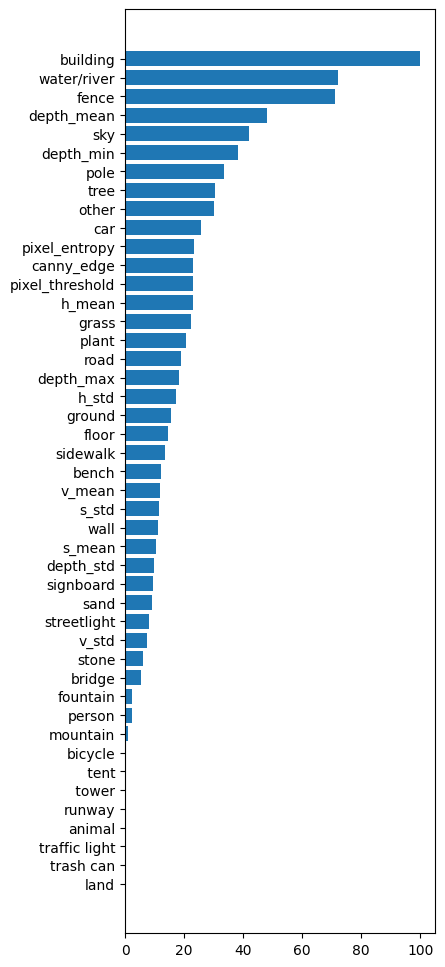

In [222]:
import numpy as np
import matplotlib.pyplot as plt

feature_importance=gbdt.feature_importances_
feature_importance=100.0*(feature_importance/feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+.5
plt.figure(figsize=(4,12))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])

In [224]:
X.columns[sorted_idx],pos

(Index(['land', 'trash can', 'traffic light', 'animal', 'runway', ' tower',
        ' tent', 'bicycle', 'mountain', 'person', 'fountain', 'bridge', 'stone',
        'v_std', 'streetlight', 'sand', 'signboard', 'depth_std', 's_mean',
        'wall', 's_std', 'v_mean', 'bench', 'sidewalk', 'floor', 'ground',
        'h_std', 'depth_max', 'road', 'plant', 'grass', 'h_mean',
        'pixel_threshold', 'canny_edge', 'pixel_entropy', 'car', 'other',
        'tree', 'pole', 'depth_min', 'sky', 'depth_mean', 'fence',
        'water/river', 'building'],
       dtype='object'),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5]))

# 2. Predict Results

In [228]:
# 读取csv文件
df = pd.read_csv('D:/desk/JNU/imgfeatures.csv')
df.head()
X = df.iloc[:,3:48]
X.head(2)

,depth_max,depth_min,depth_mean,depth_std,canny_edge,h_mean,h_std,s_mean,s_std,v_mean,...,pole,land,fountain,tent,animal,bicycle,traffic light,trash can,car,water/river
0,6.399497,0.790208,3.525452,1.245211,45.635,0.33486,0.28203,0.14329,0.22406,0.70718,...,0.000312,0.00001,0.00001,0.00001,0.000247,0.012121,0.00001,0.001644,0.034697,0.000010
1,5.476709,0.668369,2.655593,1.393695,58.207,0.26710,0.17824,0.31964,0.30333,0.44546,...,0.001028,0.00001,0.00001,0.00001,0.000010,0.073665,0.00001,0.000010,0.030102,0.000571


In [25]:
my_model_load = joblib.load('D:/desk/JNU/MLpredictionresults/test.pkl')      

In [229]:
# 预测新数据
pre = gbdt.predict(X)

pre

array([4.23968368, 4.17312083, 4.23128858, ..., 4.32080638, 3.80705386,
       4.61967674])

In [231]:
df['fanscination'] = pre # 添加一列，名为new_column，内容为array数组
df.to_csv('D:/desk/JNU/imgfeatures.csv', index=False) # 写入到csv文件，不保留索引

In [232]:
df.head()

,id,lon,lat,depth_max,depth_min,depth_mean,depth_std,canny_edge,h_mean,h_std,...,trash can,car,water/river,being_away,coherence,scope,fascination,fanscination,being_away1,scope1
0,1,120.268179,31.493881,6.399497,0.790208,3.525452,1.245211,45.635,0.33486,0.28203,...,0.001644,0.034697,0.000010,3.491779,4.151338,4.108647,3.849987,4.239684,3.890007,4.189986
1,2,120.268209,31.493562,5.476709,0.668369,2.655593,1.393695,58.207,0.26710,0.17824,...,0.000010,0.030102,0.000571,3.379618,3.702281,3.003619,4.178521,4.173121,4.178873,4.257025
2,3,120.268239,31.493243,5.580865,0.677712,2.389539,1.166760,49.823,0.43462,0.22064,...,0.000004,0.024501,0.000010,2.772662,3.830041,2.670004,4.281639,4.231289,4.230232,4.422028
3,4,120.268241,31.492976,5.494517,0.722657,2.766001,1.088876,51.578,0.34956,0.23546,...,0.000010,0.033785,0.000010,2.618515,3.893922,3.168444,4.042594,4.054840,4.043075,4.316374
4,5,120.268244,31.492708,7.085224,0.810844,3.806053,1.222608,90.732,0.27553,0.21916,...,0.000010,0.035067,0.000010,3.614987,3.827000,3.927591,3.911910,3.902534,3.923202,4.307123


# 3. SHAP Visualization

In [25]:
import shap
import joblib
import pandas as pd
shap.initjs()  # notebook环境下，加载用于可视化的JS代码
import matplotlib.pyplot as plt

In [88]:
#my_model_load = joblib.load('D:/desk/JNU/MLpredictionresults/scope.pkl')

In [233]:
explainer = shap.TreeExplainer(gbdt)
shap_values = explainer.shap_values(X)

In [202]:
shap_values

array([[-0.01342098, -0.04115848, -0.08361506, ...,  0.        ,
         0.00731688, -0.08287511],
       [-0.01337772, -0.0311682 , -0.00216332, ...,  0.        ,
        -0.04064113, -0.08463948],
       [-0.00188247, -0.02866002, -0.06815691, ...,  0.        ,
        -0.03133746, -0.07444536],
       ...,
       [-0.00634499, -0.02750005, -0.0892118 , ...,  0.        ,
         0.01647986, -0.0824118 ],
       [-0.00162146,  0.03401101, -0.09037806, ...,  0.        ,
         0.00876445,  0.10570746],
       [ 0.00521579,  0.00144083,  0.00180978, ...,  0.        ,
        -0.03173468, -0.0977497 ]])

In [29]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

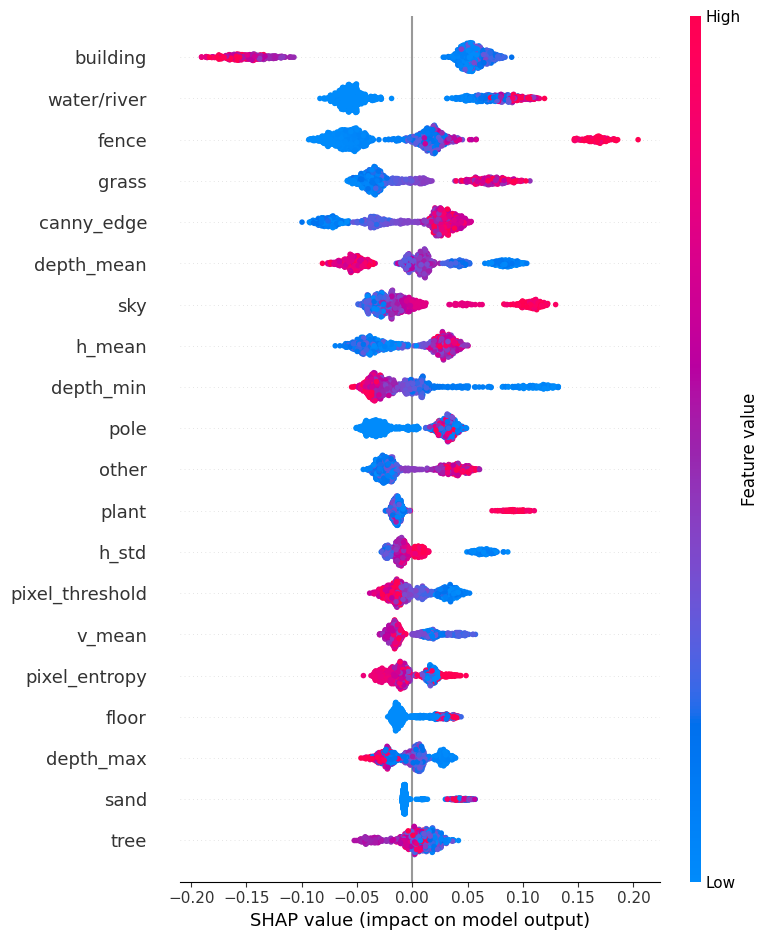

In [236]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X, show = False)
#plt.savefig("D:/desk/JNU/fig/fascination_feature.jpg", dpi = 600)

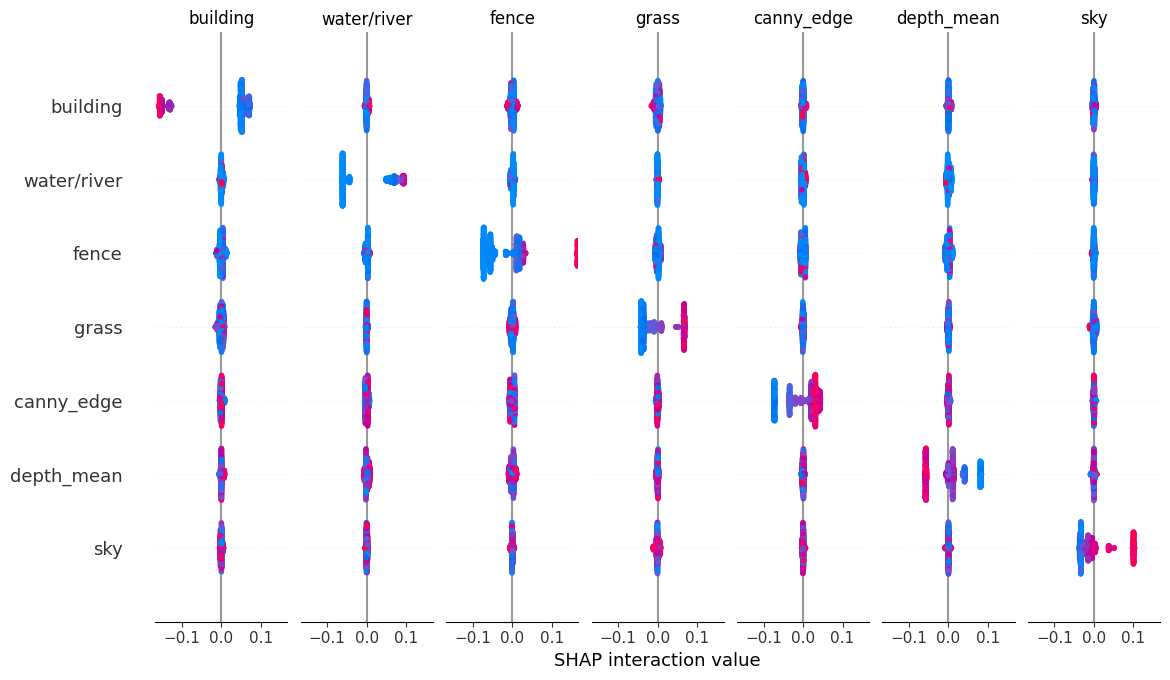

In [235]:
shap_interaction_values = explainer.shap_interaction_values(X)
shap.summary_plot(shap_interaction_values, X)

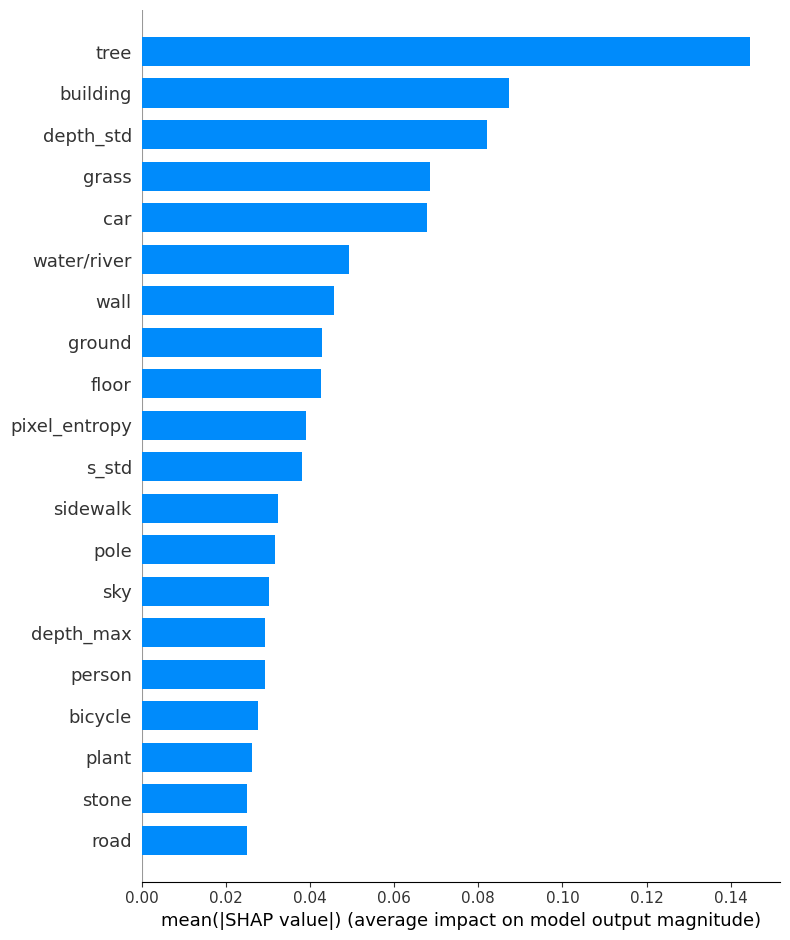

In [30]:
shap.summary_plot(shap_values, X, plot_type="bar")

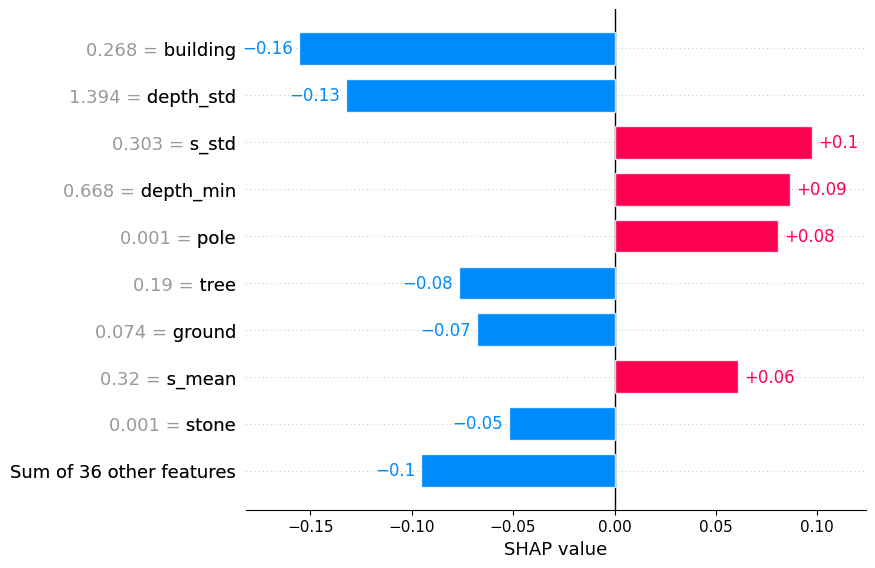

In [31]:
shap.plots.bar(explainer(X)[1], show_data=True)